In [1]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
from scripts.triplet_functions import n_neurons
import pandas as pd
import os


# os.environ['CUDA_VISIBLE_DEVICES'] = '1'

init_gpu.initialize_gpus()

locations = ['LOC2', 'LOC3']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# get train-test set
train_df, test_df, train_web_samples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

2025-01-29 01:17:51.643796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738093676.426920  827885 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738093677.132380  827885 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 01:18:05.091382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0
Loading Dataset...


2025-01-29 01:19:27.593790: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 663, 1000, 39, 229, 743, 629, 490, 118, 49

/home/e19372/DoH-Synthesis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,LOC2,0,-0.714089,0.541197,0.391921,-0.400778,-0.266345,-0.522526,0.023889,-0.261817,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
1,LOC2,1006,0.093792,-1.273349,-2.142801,1.205098,1.879002,2.139593,1.482513,2.382939,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
2,LOC2,1006,1.401091,-1.636258,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
3,LOC2,1006,-0.831599,0.662167,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
4,LOC2,1006,0.093792,-1.152379,-2.007616,0.827245,1.630266,1.666328,1.281324,2.311938,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216


In [2]:
import tensorflow as tf
from scripts.train_vae import VAE, Sampling, ConvVAE, ConvVAE_BatchNorm

# load models

latent_dim = 96
vae_model = tf.keras.models.load_model(f"../models-{locations[0]}-{locations[1]}/vae/ci_vae/ConvBased/domain_and_class/{locations[0]}-{locations[1]}-e800-mse1-kl0.01-cl1.0-ConvBatchNorm-ldim96-hdim128.keras", custom_objects={'ConvVAE_BatchNorm': ConvVAE_BatchNorm, 'Sampling': Sampling})

/home/e19372/anaconda3/envs/doh_synth_env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [3]:
import numpy as np
def get_z_mean_embeddings(data, vae_model=vae_model):
    embeddings = []
    chunk_size = 200
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i+chunk_size]
        # get the mean instead of z
        transformed_chunk, _, _ = vae_model.encode(chunk)
        embeddings.append(transformed_chunk)

    return np.vstack(embeddings)

In [4]:
import tensorflow as tf
import numpy as np

@tf.keras.utils.register_keras_serializable()
class SWDLoss(tf.keras.losses.Loss):
    def __init__(self, latent_dim, num_projections=50):
        super(SWDLoss, self).__init__()
        self.latent_dim = latent_dim
        self.num_projections = num_projections

    def call(self, y_true, y_pred):
        # y_true: target embeddings (z_B), y_pred: predicted embeddings (z_A)
        projections = tf.random.normal([self.num_projections, self.latent_dim])
        projections = projections / tf.norm(projections, axis=1, keepdims=True)

        proj_A = tf.matmul(y_pred, projections, transpose_b=True)
        proj_B = tf.matmul(y_true, projections, transpose_b=True)

        proj_A_sorted = tf.sort(proj_A, axis=0)
        proj_B_sorted = tf.sort(proj_B, axis=0)

        return tf.reduce_mean(tf.square(proj_A_sorted - proj_B_sorted))

In [ ]:
# Function to randomly sample pairs from matching websites
def sample_random_pairs(source_embeddings, target_embeddings, source_labels, target_labels, samples_per_website):
    unique_websites = np.unique(source_labels)
    sampled_source = []
    sampled_target = []
    
    for website in unique_websites:
        # Get indices for the current website in both source and target
        source_indices = np.where(source_labels == website)[0]
        target_indices = np.where(target_labels == website)[0]
        
        # Randomly sample indices
        source_sampled = np.random.choice(source_indices, size=samples_per_website, replace=True)
        target_sampled = np.random.choice(target_indices, size=samples_per_website, replace=True)
        
        # Collect the corresponding embeddings
        sampled_source.append(source_embeddings[source_sampled])
        sampled_target.append(target_embeddings[target_sampled])
    
    # Concatenate all sampled data
    sampled_source = np.vstack(sampled_source)
    sampled_target = np.vstack(sampled_target)
    
    return sampled_source, sampled_target

# Group embeddings by 'Website'
source_location, target_location = locations
source_data = train_df[(train_df['Location'] == source_location)].iloc[:, 2:]
target_data = train_df[(train_df['Location'] == target_location)].iloc[:, 2:]

source_labels = train_df[(train_df['Location'] == source_location)]['Website'].values
target_labels = train_df[(train_df['Location'] == target_location)]['Website'].values

# Generate source and target latent embeddings
source_latent_embeddings = get_z_mean_embeddings(source_data)
target_latent_embeddings = get_z_mean_embeddings(target_data)

# Define the translator model
translator = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(latent_dim, )),
    tf.keras.layers.Dense(latent_dim * 2, activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(latent_dim * 4, activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(latent_dim, activation=None)  # No activation for residual connection
])

# Compile the translator model
translator.compile(optimizer='adam', loss='mse')

# Training loop with dynamic sampling
epochs = 200
samples_per_website = 200

# Instantiate the SWD loss
swd_loss = SWDLoss(latent_dim=latent_dim, num_projections=32)

# Compile the translator model with the SWD loss
translator.compile(optimizer='adam', loss=swd_loss)

for epoch in range(epochs):

    print(f"{epoch + 1} of {epochs}")
    # Randomly sample pairs for the current epoch
    sampled_source, sampled_target = sample_random_pairs(
        source_latent_embeddings, 
        target_latent_embeddings, 
        source_labels, 
        target_labels, 
        samples_per_website
    )
    
    # Train on the sampled data
    translator.fit(sampled_source, sampled_target, epochs=1, verbose=1, shuffle=True, batch_size=32)

# translator.fit(source_latent_embeddings, target_latent_embeddings, epochs=100, verbose=1, shuffle=1, batch_size=128)
translator.save(f"../models-{locations[0]}-{locations[1]}/latent_translator/translator-kl0.01-e200.keras")

1 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 524us/step - loss: 0.3876
2 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 507us/step - loss: 0.2914
3 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 505us/step - loss: 0.2758
4 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 498us/step - loss: 0.2689
5 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 507us/step - loss: 0.2676
6 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 510us/step - loss: 0.2648
7 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 528us/step - loss: 0.2632
8 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 552us/step - loss: 0.2624
9 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 566us/step - loss: 0.2597
10 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 551us/step - loss: 0.2599
11 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 557us/step - loss: 0.2598
12 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 532us/step - loss: 0.2580
13 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 570us/step - loss: 0.2581
14 of 200
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 558us/step - loss: 0.2577
15 of 200
7500/7500 ━━━━━━━━━

In [17]:
translator = tf.keras.models.load_model(f"../models-{locations[0]}-{locations[1]}/latent_translator/translator-kl0.01-e200.keras", custom_objects={'SWDLoss': SWDLoss})

TypeError: <class '__main__.SWDLoss'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': None, 'class_name': 'SWDLoss', 'config': {'name': 'swd_loss_2', 'reduction': 'sum_over_batch_size'}, 'registered_name': 'SWDLoss'}.

Exception encountered: SWDLoss.__init__() got an unexpected keyword argument 'name'

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np
import matplotlib.pyplot as plt
import warnings

def reduce_and_visualize(reference_data_dict, query_data_dict, method='pca', random_state=42, **kwargs):
    """
    Perform dimensionality reduction and visualization, fitting only on reference data.
    
    Parameters:
    -----------
    reference_data_dict : dict
        Dictionary of reference datasets to fit the reducer on. Format: {'name': array}
    query_data_dict : dict
        Dictionary of query datasets to transform. Format: {'name': array}
    method : str, optional (default='pca')
        Dimensionality reduction method: 'pca', 'tsne', or 'umap'
    random_state : int, optional (default=42)
        Random state for reproducibility
    **kwargs : dict
        Additional parameters for the reduction method or visualization
        
    Returns:
    --------
    tuple: (reducer, dict of reduced reference data, dict of reduced query data)
    """
    # Combine reference data for fitting
    combined_reference = np.vstack(list(reference_data_dict.values()))
    
    # Initialize reducer based on method
    if method.lower() == 'pca':
        reducer = PCA(n_components=2, random_state=random_state)
    elif method.lower() == 'tsne':
        reducer = TSNE(n_components=2, random_state=random_state)
    elif method.lower() == 'umap':
        reducer = umap.UMAP(n_components=2, random_state=random_state)
    else:
        raise ValueError(f"Unsupported method: {method}")
    
    # Fit on reference data only
    if method.lower() == 'pca':
        reducer.fit(combined_reference)
        # Transform reference data
        reduced_reference = {
            name: reducer.transform(data) 
            for name, data in reference_data_dict.items()
        }
        # Transform query data
        reduced_query = {
            name: reducer.transform(data) 
            for name, data in query_data_dict.items()
        }
    else:
        # For TSNE and UMAP, we need to fit_transform all data together
        # First transform reference data
        reduced_combined_reference = reducer.fit_transform(combined_reference)
        
        # Split the reduced reference data
        start_idx = 0
        reduced_reference = {}
        for name, data in reference_data_dict.items():
            end_idx = start_idx + len(data)
            reduced_reference[name] = reduced_combined_reference[start_idx:end_idx]
            start_idx = end_idx
        
        # Transform query data
        reduced_query = {}
        for name, data in query_data_dict.items():
            if method.lower() == 'tsne':
                # For t-SNE, we need to use a different approach for out-of-sample transform
                warnings.warn("t-SNE doesn't support transform of new samples. Consider using PCA or UMAP instead.")
                reduced_query[name] = None
            else:
                reduced_query[name] = reducer.transform(data)
    
    # Create visualization
    plt.figure(figsize=kwargs.get('figsize', (10, 6)))
    
    # Plot reference data
    for name, data in reduced_reference.items():
        plt.scatter(
            data[:, 0], 
            data[:, 1],
            label=name,
            color=kwargs.get('colors', {}).get(name, None),
            marker=kwargs.get('markers', {}).get(name, 'o'),
            alpha=kwargs.get('alpha', 0.6)
        )
    
    # Plot query data
    for name, data in reduced_query.items():
        if data is not None:
            plt.scatter(
                data[:, 0], 
                data[:, 1],
                label=name,
                color=kwargs.get('colors', {}).get(name, None),
                marker=kwargs.get('markers', {}).get(name, '^'),
                alpha=kwargs.get('alpha', 0.6)
            )
    
    plt.title(f"{method.upper()} Visualization - {kwargs.get('title', '')}")
    plt.legend()
    
    if kwargs.get('show', True):
        plt.show()
    
    # return reducer, reduced_reference, reduced_query
    return None

def plot_synth_and_nearest_neighbour(z_new, target_latent_embeddings, target_data, target_website,  vae_model):
    synth = vae_model.decode(z_new.reshape(1, -1))

    distances = tf.sqrt(tf.reduce_mean(tf.square(target_latent_embeddings - z_new.reshape(1, -1)), axis=1))

    # Find the index of the closest embedding
    nearest_neighbor_index = tf.argmin(distances)

    # Get the nearest neighbor embedding and its distance
    nearest_neighbor = target_latent_embeddings[nearest_neighbor_index].numpy()
    nearest_distance = distances[nearest_neighbor_index]

    nearest_neighbor_reconstructed = vae_model.decode(nearest_neighbor.reshape(1, -1))
    nearest_neighbor_actual = target_data[nearest_neighbor_index]
    
    plt.figure()
    # plt.plot(nearest_neighbor_reconstructed[0], label='nearest neighbour recon', alpha=0.5)
    plt.plot(nearest_neighbor_actual, label='nearest neighbour actual', alpha=1)
    plt.plot(synth[0], label='synthesis')
    plt.title(f"Website: {target_website}")
    plt.legend()
    plt.show()
    plt.close()

def plot_synth_and_source(z_new, source, target_website, vae_model):
    synth = vae_model.decode(z_new.reshape(1, -1))
    plt.figure()
    plt.plot(source[0], label='source')
    plt.plot(synth[0], label='synthesized')
    plt.title(f"Website: {target_website}")
    plt.legend()
    plt.show()
    plt.close()
    


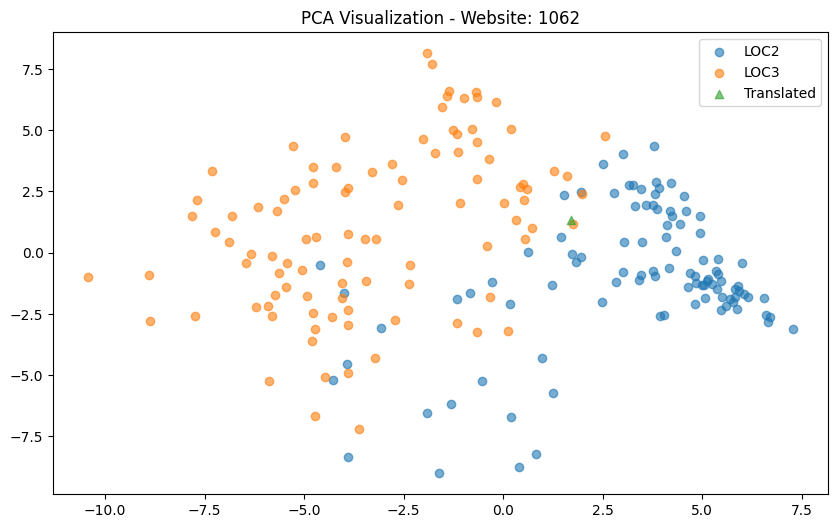

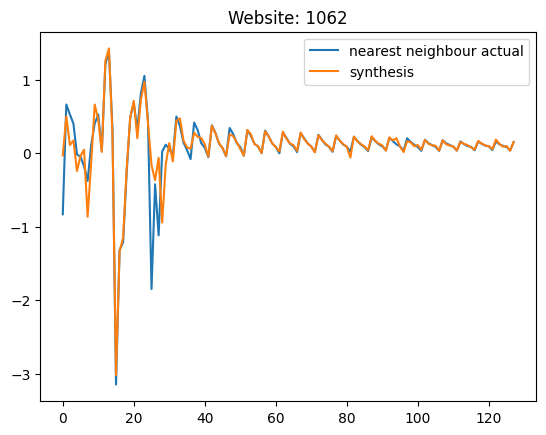

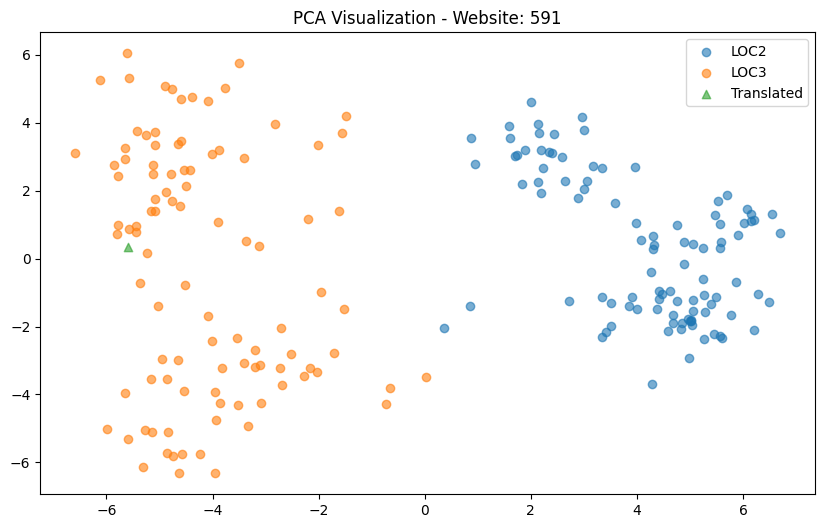

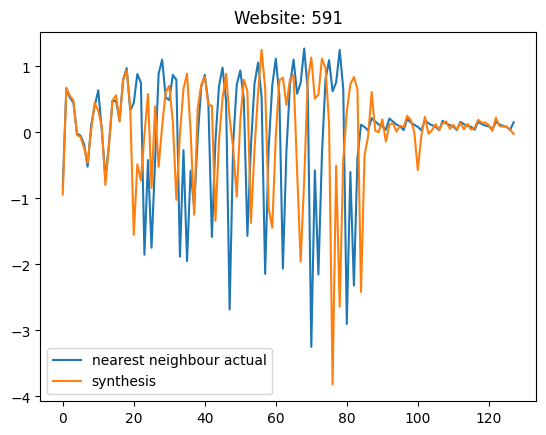

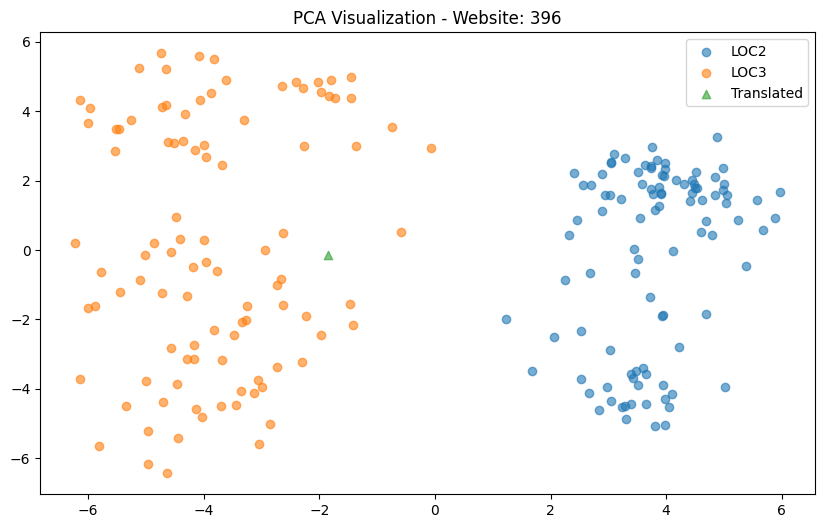

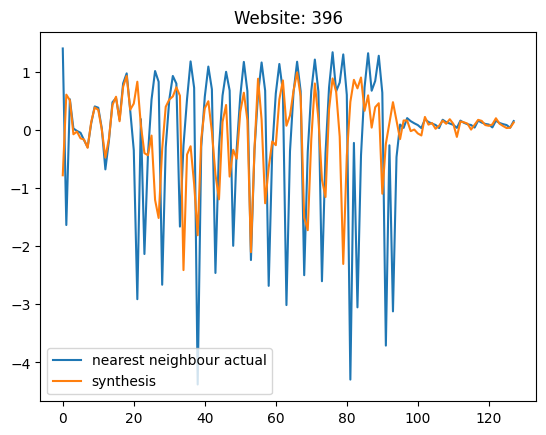

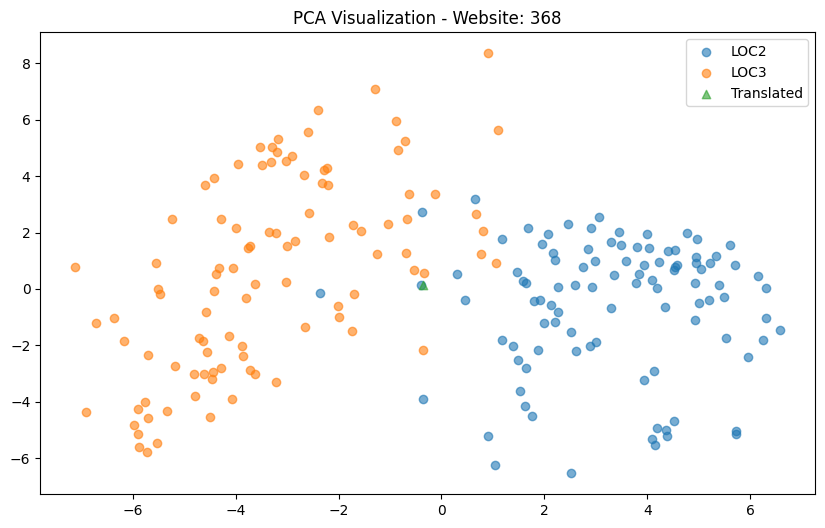

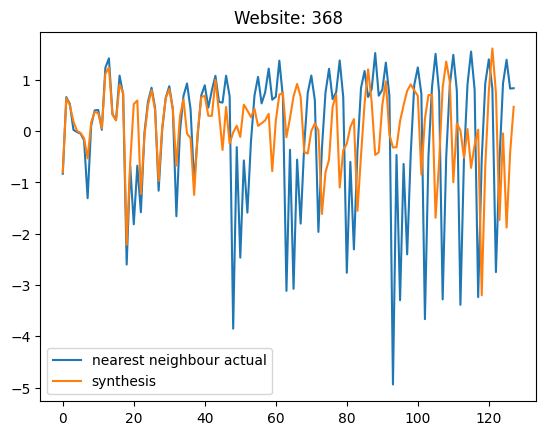

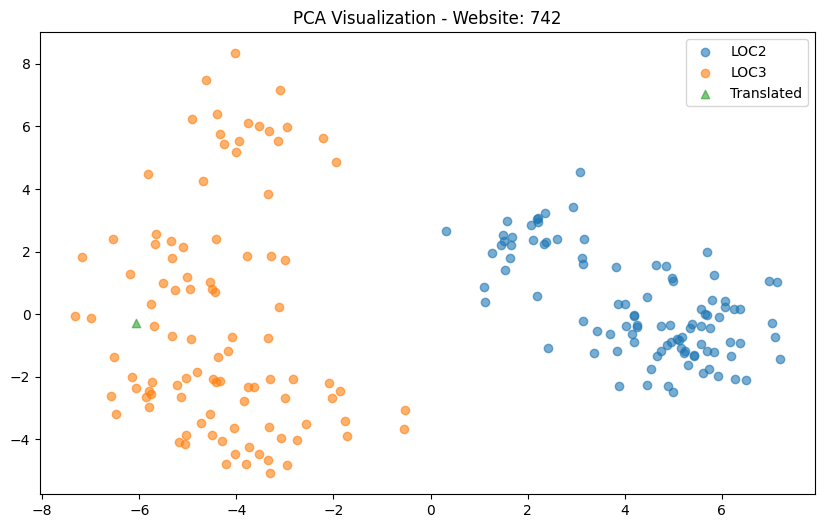

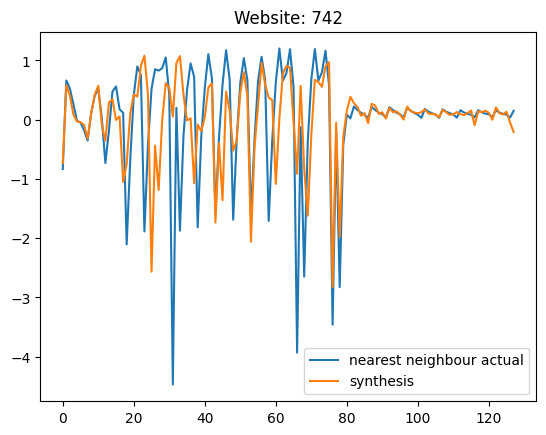

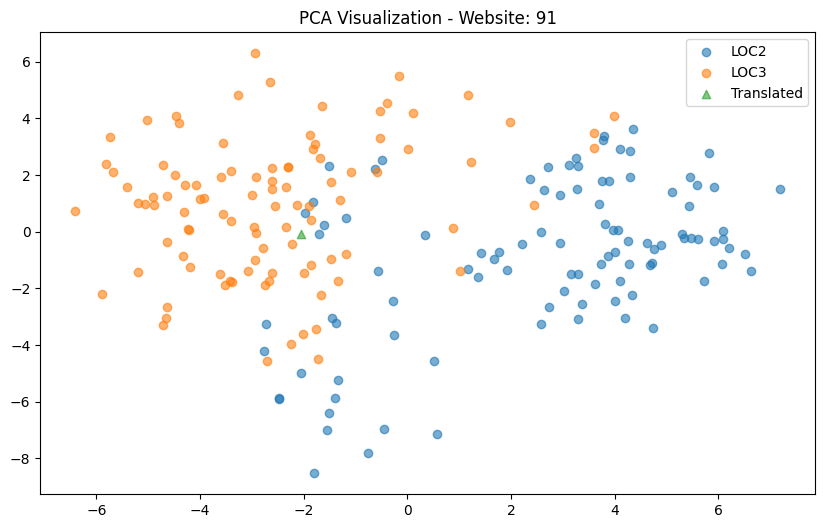

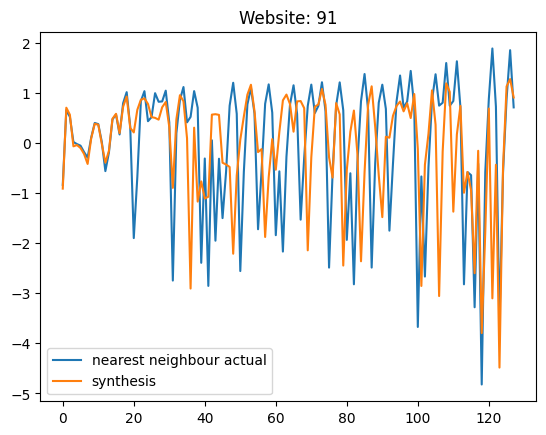

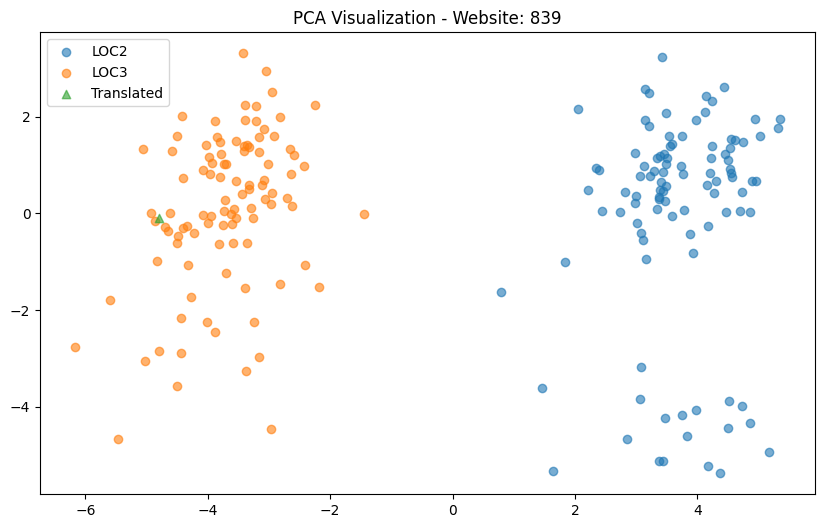

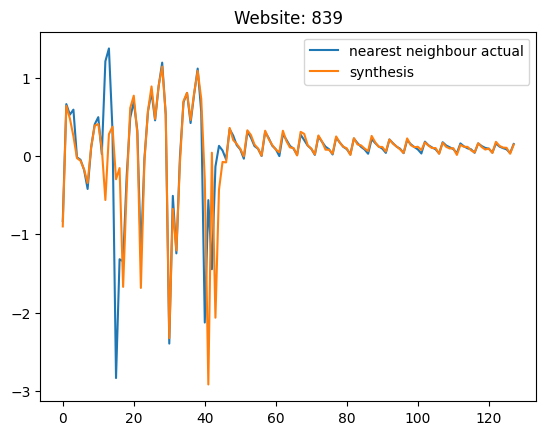

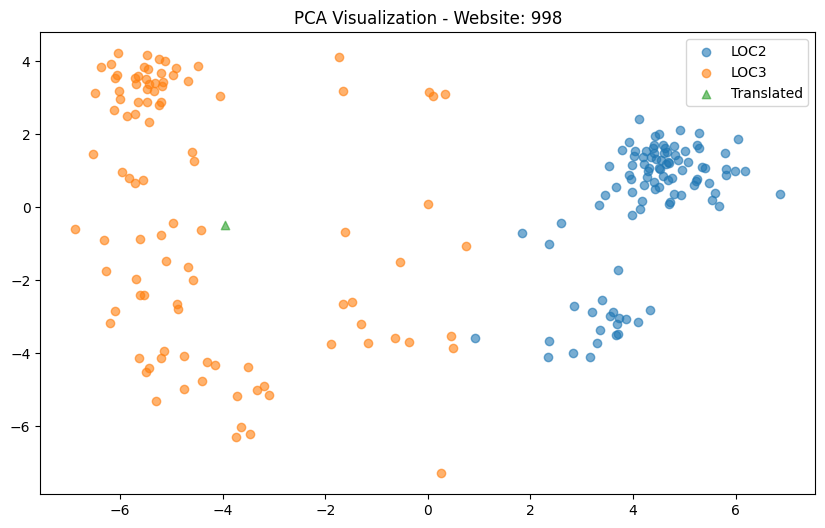

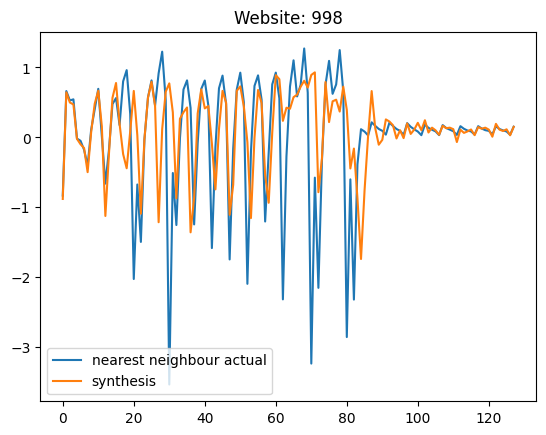

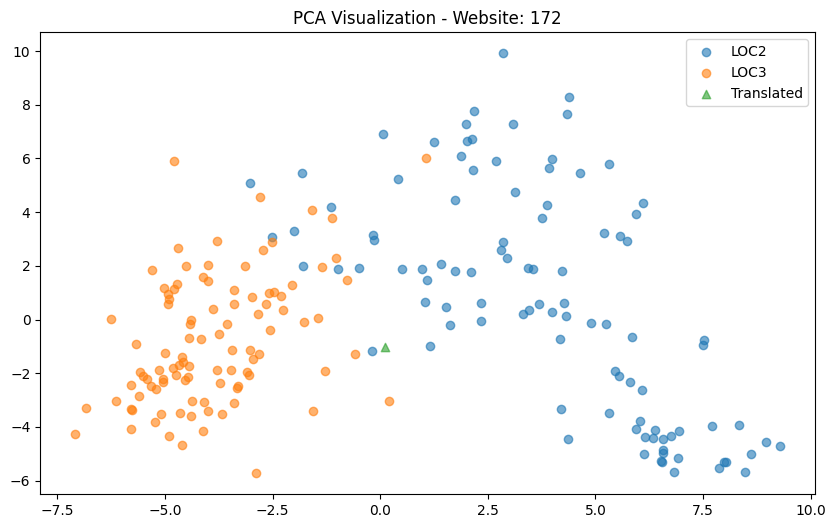

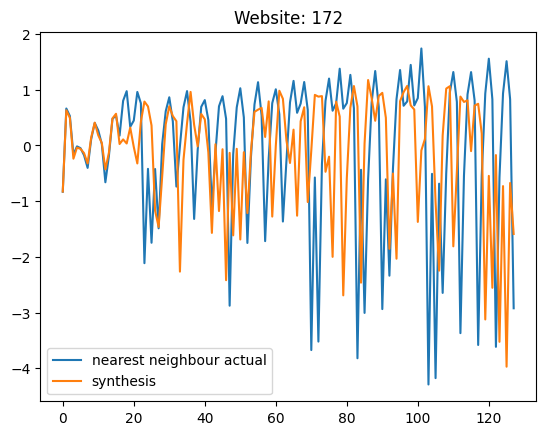

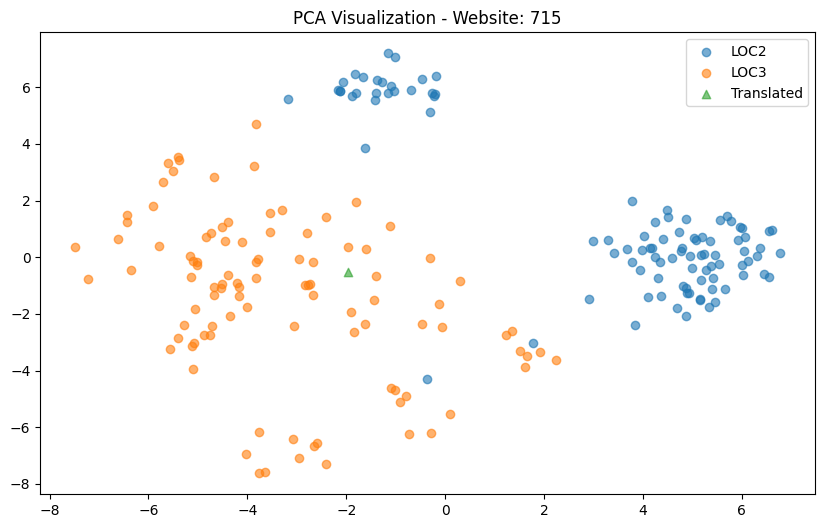

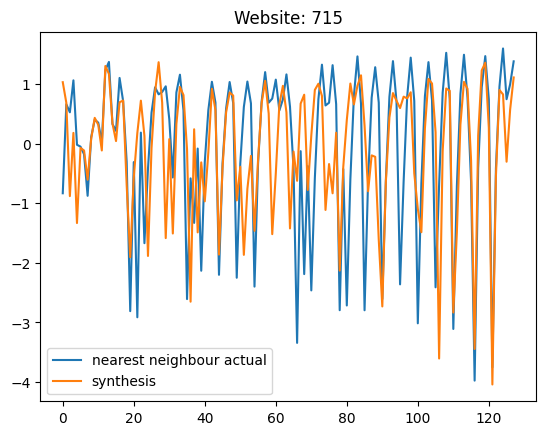

In [17]:
import random
random.seed()

for selected_website in random.sample(test_web_samples, 10):
    source_location, target_location = locations

    # Get all the samples for the selected data
    source_selected_website = test_df[(test_df['Website'] == selected_website) & (test_df['Location'] == source_location)].iloc[:, 2:]
    target_selected_website = test_df[(test_df['Website'] == selected_website) & (test_df['Location'] == target_location)].iloc[:, 2:]


    _, _, source_selected_latent_embeddings = vae_model.encode(source_selected_website)
    _, _, target_selected_latent_embeddings = vae_model.encode(target_selected_website)

    # Randomly select any LOC1 sample
    source_sample = source_selected_website.sample().to_numpy()
    _, _, source_latent_embedding = vae_model.encode(source_sample)

    # source_latent_embedding = source_selected_latent_embeddings.numpy().mean(axis=0)

    source_selected_website = source_selected_website.to_numpy()
    target_selected_website = target_selected_website.to_numpy()

    translated_z = translator(source_latent_embedding)
    reference_data = {
        source_location: source_selected_latent_embeddings,
        target_location: target_selected_latent_embeddings
    }

    query_data = {
        'Translated': translated_z
    }


    reduce_and_visualize(
        reference_data,
        query_data,
        method='pca',
        title=f"Website: {selected_website}",
    )

    plot_synth_and_nearest_neighbour(translated_z.numpy(), target_selected_latent_embeddings, target_selected_website, selected_website, vae_model)

# Interpolation between two samples

In [63]:
import numpy as np
def slerp(val, low, high):
    """
    Spherical linear interpolation between two vectors.
    """
    omega = np.arccos(np.clip(np.dot(low / np.linalg.norm(low), high / np.linalg.norm(high)), -1, 1))
    if omega == 0:
        return low
    so = np.sin(omega)
    return (np.sin((1.0 - val) * omega) / so) * low + (np.sin(val * omega) / so) * high

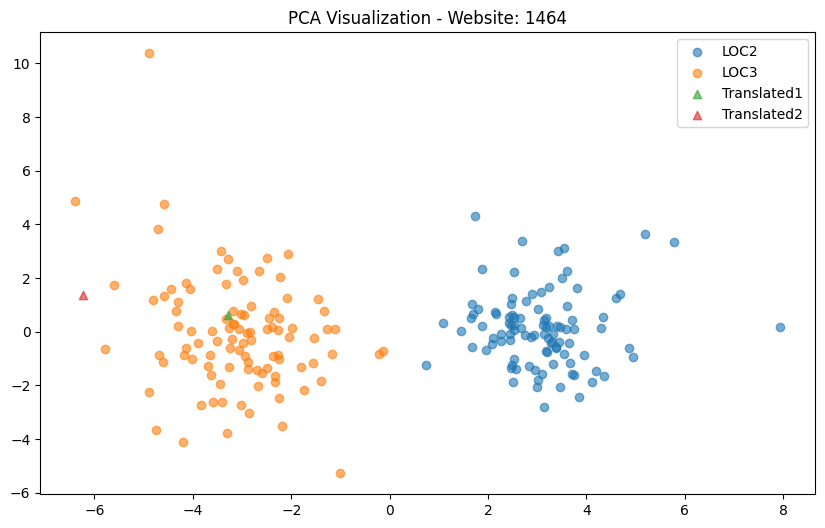

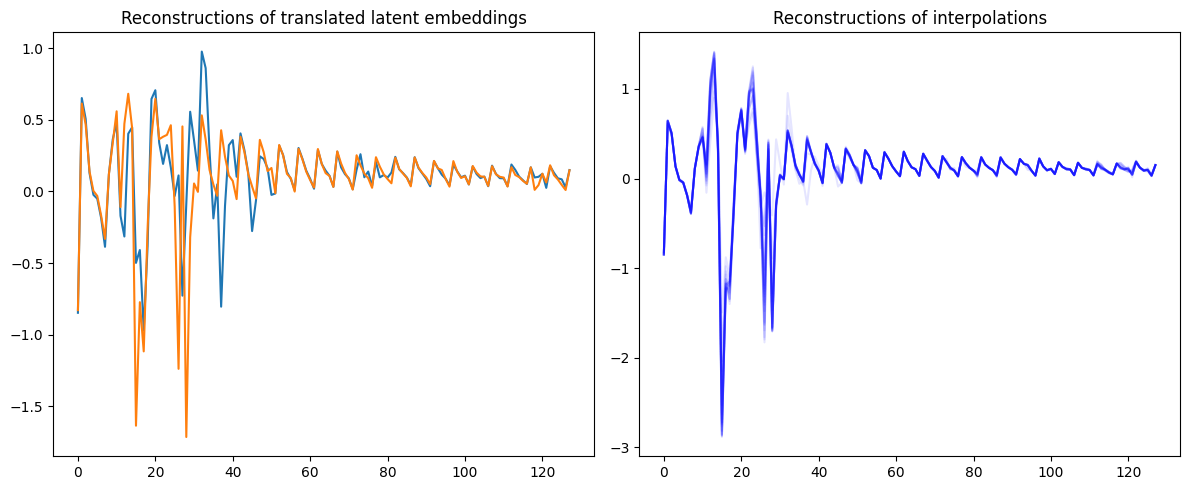

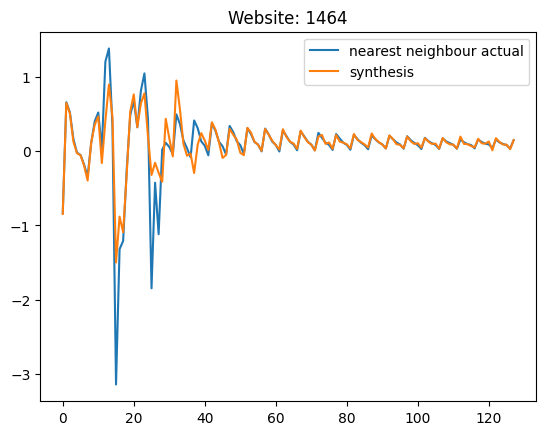

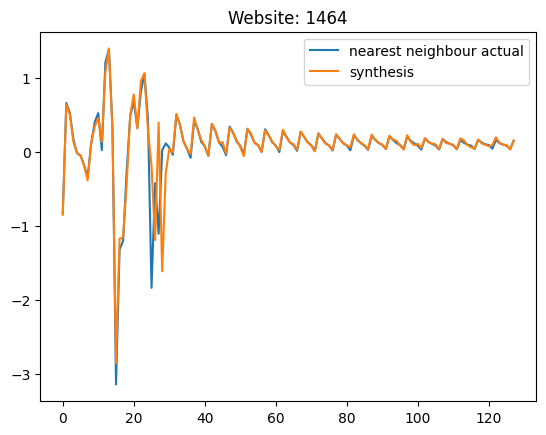

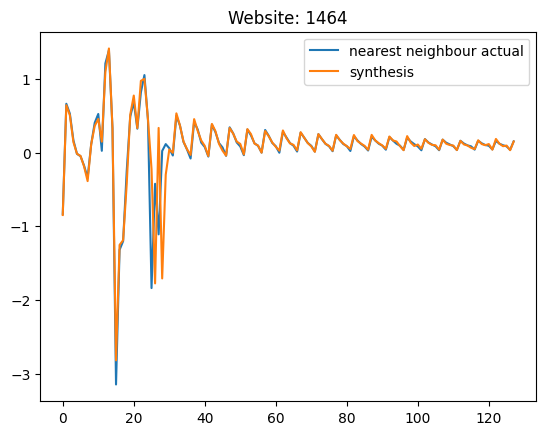

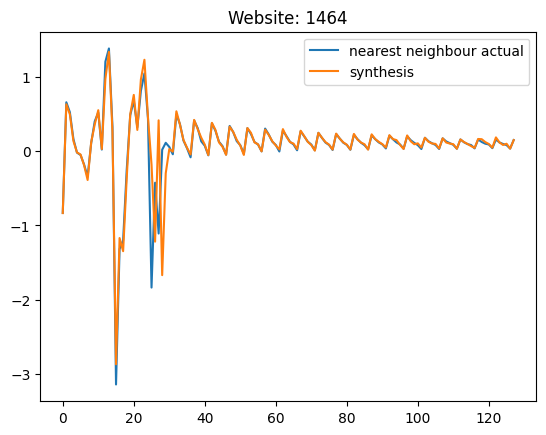

In [64]:
random.seed()
selected_website = random.sample(test_web_samples, 1)[0]
source_selected_website = test_df[
    (test_df['Website'] == selected_website) & 
    (test_df['Location'] == source_location)
].iloc[:, 2:]

target_selected_website = test_df[
    (test_df['Website'] == selected_website) & 
    (test_df['Location'] == target_location)
].iloc[:, 2:]

# Encode the selected data to latent embeddings
_, _, source_selected_latent_embeddings = vae_model.encode(source_selected_website)
_, _, target_selected_latent_embeddings = vae_model.encode(target_selected_website)

# Randomly select two source samples
source_sample1 = source_selected_website.sample().to_numpy()
_, _, source_latent_embedding1 = vae_model.encode(source_sample1)

source_sample2 = source_selected_website.sample().to_numpy()
_, _, source_latent_embedding2 = vae_model.encode(source_sample2)

# Translate the selected source embeddings to target domain
translated_z1 = translator(source_latent_embedding1)
translated_z2 = translator(source_latent_embedding2)


# Perform slerp to create interpolated embeddings
num_interpolations = 20
interpolated_embeddings = []
for i in range(1, num_interpolations + 1):
    val = i / (num_interpolations + 1)  # e.g., 0.166, 0.333, ..., 0.833
    interpolated_z = slerp(val, translated_z1.numpy()[0], translated_z2.numpy()[0])
    interpolated_embeddings.append(interpolated_z)

interpolated_embeddings = np.array(interpolated_embeddings)
reconstructed_interpolations= vae_model.decode(interpolated_embeddings)

reference_data = {
        source_location: source_selected_latent_embeddings,
        target_location: target_selected_latent_embeddings
    }
    
# Prepare query data including translated embeddings and interpolations
query_data = {
    'Translated1': translated_z1,
    'Translated2': translated_z2,
}


reduce_and_visualize(
    reference_data,
    query_data,
    method='pca',
    title=f"Website: {selected_website}",
)


plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(vae_model.decode(translated_z1)[0], label='start')
plt.plot(vae_model.decode(translated_z2)[0], label='end')
plt.title('Reconstructions of translated latent embeddings')

plt.subplot(1, 2, 2)
for i in range(num_interpolations):
    plt.plot(reconstructed_interpolations[i], alpha=0.1, c='b')
plt.title("Reconstructions of interpolations")
plt.tight_layout()
plt.show()
plt.close()


for i in range(0, num_interpolations, num_interpolations // 4):
        plot_synth_and_nearest_neighbour(interpolated_embeddings[i].reshape(1, -1), target_selected_latent_embeddings, target_selected_website.to_numpy(), selected_website, vae_model)

# Sampling around the translated point

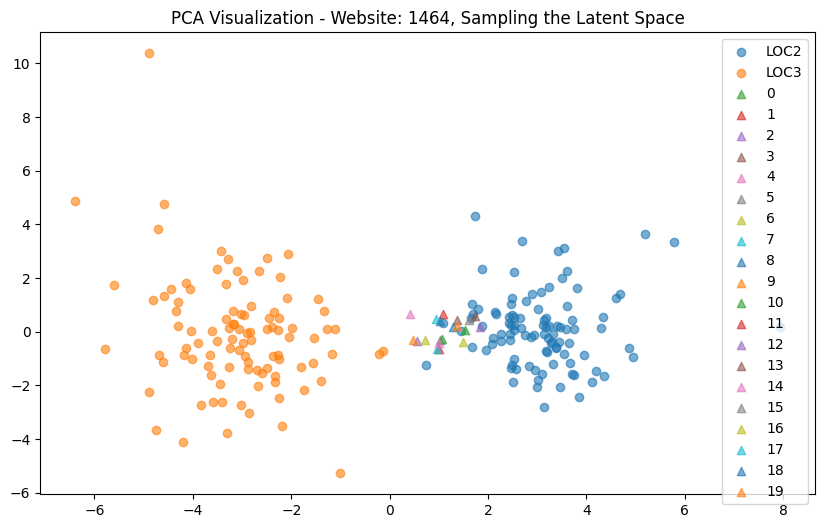

(20, 96)


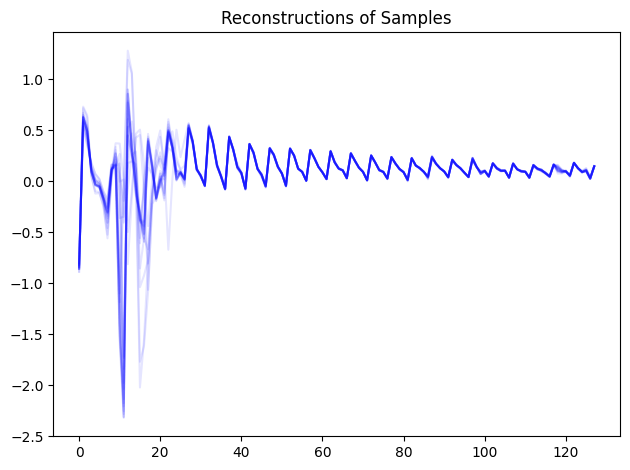

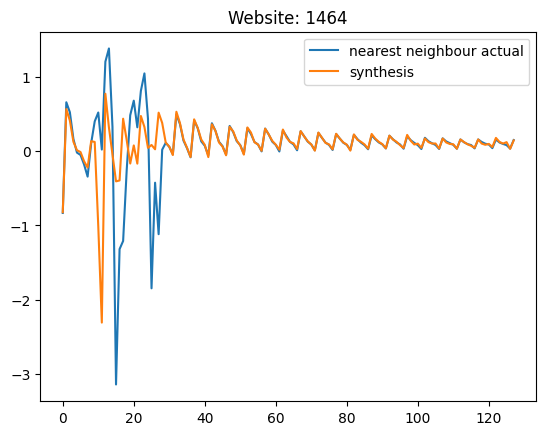

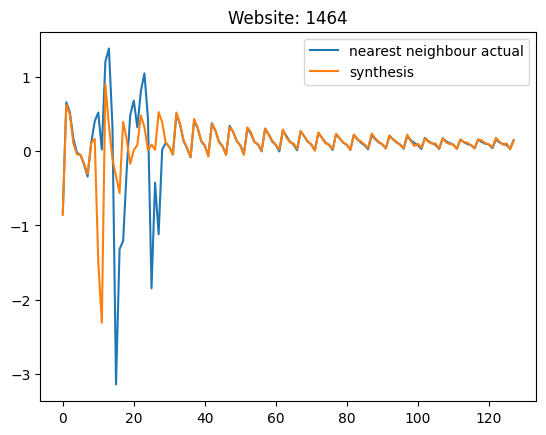

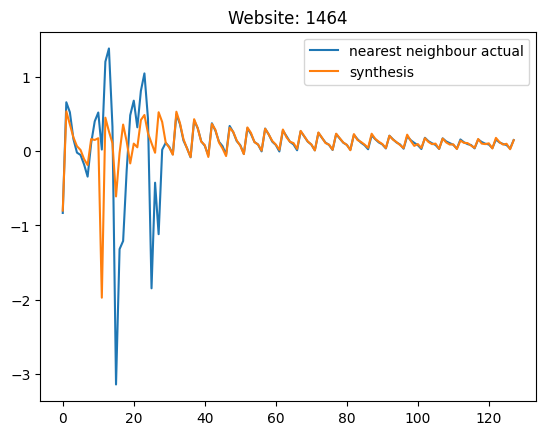

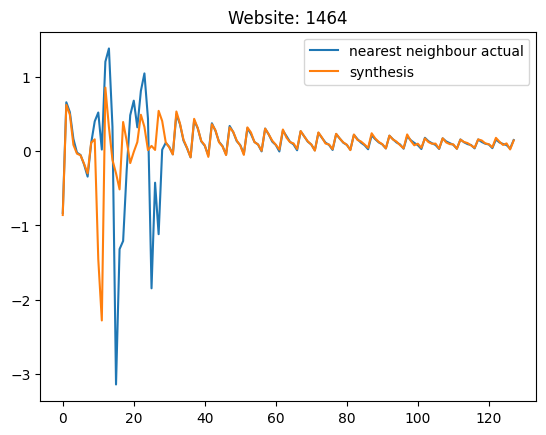

In [65]:
from scripts.train_vae import Sampling
sampling = Sampling()
sample_synthesis = vae_model.decode(translated_z1)
z_mean, z_log_var, _ = vae_model.encode(sample_synthesis)

z_samples = []
num_samples = 20
for i in range(num_samples):
    z_samples.append(sampling((z_mean, z_log_var)))
    
z_samples = np.vstack(z_samples)

query_data = {
    i: z_samples[i].reshape(1, -1) for i in range(len(z_samples))
}

reduce_and_visualize(
    reference_data,
    query_data,
    method='pca',
    title=f"Website: {selected_website}, Sampling the Latent Space",
)

print(z_samples.shape)
reconstructed_z_samples = vae_model.decode(z_samples)
plt.figure()
for i in range(num_interpolations):
    plt.plot(reconstructed_z_samples[i], alpha=0.1, c='b')
plt.title("Reconstructions of Samples")
plt.tight_layout()
plt.show()
plt.close()


for i in range(0, num_samples, num_samples // 4):
        plot_synth_and_nearest_neighbour(z_samples[i].reshape(1, -1), target_selected_latent_embeddings, target_selected_website.to_numpy(), selected_website, vae_model)